In [ ]:
# Executive Dashboard – Business Performance Overview

# This dashboard provides leadership with a high-level view
# of revenue, growth, and customer activity using curated KPI
# snapshots from Snowflake.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")


In [2]:
import sys
sys.path.append("../src")

from snowflake_client import get_engine

engine = get_engine()


In [3]:
df_exec = pd.read_sql(
    "SELECT * FROM executive_daily_snapshot ORDER BY report_date",
    engine
)


In [4]:
df_exec.shape
df_exec.tail()


,report_date,total_orders,total_revenue,active_customers,avg_order_value,created_at
190,2026-01-30,0,NaN,0,NaN,2026-01-31 22:00:02.150
191,2026-01-31,1,6452.15,1,6452.15,2026-02-02 12:20:21.354
192,2026-01-31,0,NaN,0,NaN,2026-02-01 22:00:01.639
193,2026-02-01,1,12201.28,1,12201.28,2026-02-02 12:20:21.354
194,2026-02-02,1,8148.15,1,8148.15,2026-02-02 12:20:21.354


In [5]:
latest = df_exec.iloc[-1]


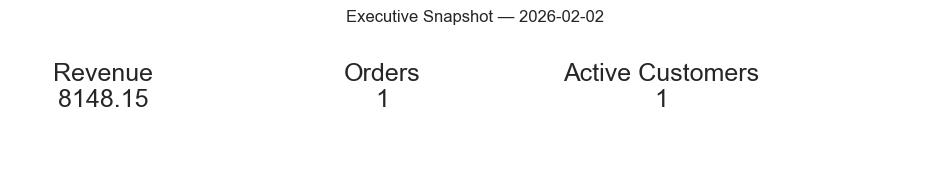

In [6]:
revenue = latest["total_revenue"] or 0
orders = latest["total_orders"] or 0
customers = latest["active_customers"] or 0

fig, ax = plt.subplots(figsize=(12,2))
ax.axis("off")

ax.text(0.1, 0.5, f"Revenue\n{revenue:.2f}",
        fontsize=18, ha="center")

ax.text(0.4, 0.5, f"Orders\n{orders}",
        fontsize=18, ha="center")

ax.text(0.7, 0.5, f"Active Customers\n{customers}",
        fontsize=18, ha="center")

plt.title(f"Executive Snapshot — {latest['report_date']}")
plt.show()


In [7]:

df_growth = pd.read_sql(
    "SELECT * FROM weekly_growth_kpis ORDER BY week_start",
    engine
)


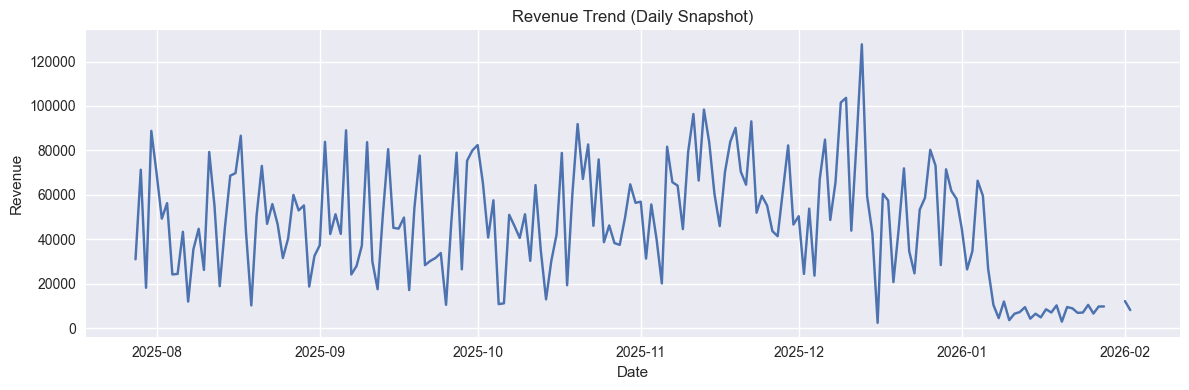

In [8]:
plt.figure(figsize=(12,4))
plt.plot(df_exec["report_date"], df_exec["total_revenue"])
plt.title("Revenue Trend (Daily Snapshot)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


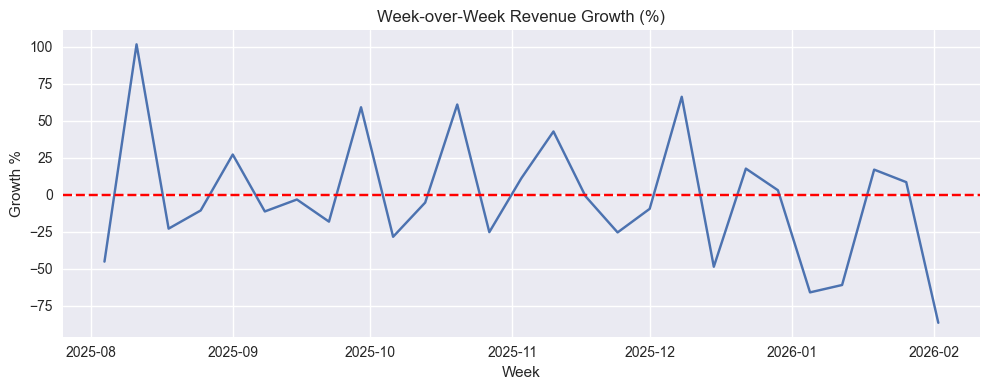

In [9]:
plt.figure(figsize=(10,4))
plt.plot(df_growth["week_start"], df_growth["wow_growth_pct"])
plt.axhline(0, color="red", linestyle="--")
plt.title("Week-over-Week Revenue Growth (%)")
plt.xlabel("Week")
plt.ylabel("Growth %")
plt.tight_layout()
plt.show()


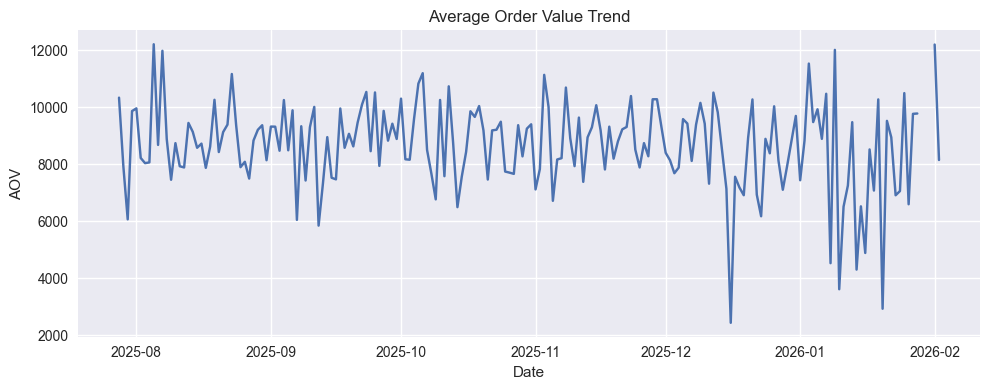

In [10]:
if df_exec["avg_order_value"].notna().sum() == 0:
    print("No AOV data available to plot")
else:
    plt.figure(figsize=(10,4))
    plt.plot(df_exec["report_date"], df_exec["avg_order_value"])
    plt.title("Average Order Value Trend")
    plt.xlabel("Date")
    plt.ylabel("AOV")
    plt.tight_layout()
    plt.show()


In [11]:
df_exec.tail()


,report_date,total_orders,total_revenue,active_customers,avg_order_value,created_at
190,2026-01-30,0,NaN,0,NaN,2026-01-31 22:00:02.150
191,2026-01-31,1,6452.15,1,6452.15,2026-02-02 12:20:21.354
192,2026-01-31,0,NaN,0,NaN,2026-02-01 22:00:01.639
193,2026-02-01,1,12201.28,1,12201.28,2026-02-02 12:20:21.354
194,2026-02-02,1,8148.15,1,8148.15,2026-02-02 12:20:21.354


In [12]:
print("📌 Executive Insights")
print("----------------------")
print(f"Latest Revenue: {latest['total_revenue']}")
print(f"WoW Growth (%): {df_growth.iloc[-1]['wow_growth_pct']}")
print(f"Average Order Value: {latest['avg_order_value']}")


📌 Executive Insights
----------------------
Latest Revenue: 8148.15
WoW Growth (%): -86.61
Average Order Value: 8148.15


In [13]:
df_exec[["report_date", "avg_order_value"]]


,report_date,avg_order_value
0,2025-07-28,10337.18
1,2025-07-29,7922.72
2,2025-07-30,6064.41
3,2025-07-31,9865.73
4,2025-08-01,9960.57
...,...,...
190,2026-01-30,NaN
191,2026-01-31,6452.15
192,2026-01-31,NaN
193,2026-02-01,12201.28


In [14]:
df_exec.tail()


,report_date,total_orders,total_revenue,active_customers,avg_order_value,created_at
190,2026-01-30,0,NaN,0,NaN,2026-01-31 22:00:02.150
191,2026-01-31,1,6452.15,1,6452.15,2026-02-02 12:20:21.354
192,2026-01-31,0,NaN,0,NaN,2026-02-01 22:00:01.639
193,2026-02-01,1,12201.28,1,12201.28,2026-02-02 12:20:21.354
194,2026-02-02,1,8148.15,1,8148.15,2026-02-02 12:20:21.354


In [ ]:
# will start dashboard now

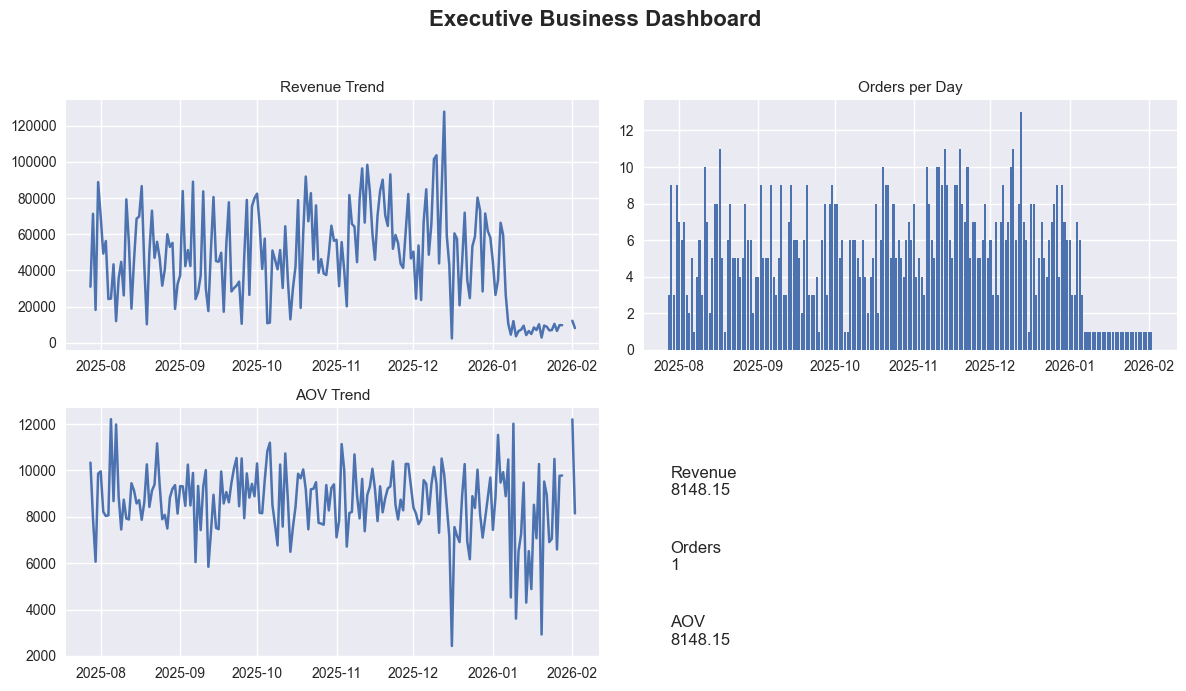

In [31]:
# Create dashboard
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
fig.suptitle("Executive Business Dashboard", fontsize=16, fontweight="bold")

# Revenue Trend
axes[0,0].plot(df_exec["report_date"], df_exec["total_revenue"], linewidth=1.8)
axes[0,0].set_title("Revenue Trend", fontsize=11)

# Orders Bar
axes[0,1].bar(df_exec["report_date"], df_exec["total_orders"])
axes[0,1].set_title("Orders per Day", fontsize=11)

# AOV Trend
axes[1,0].plot(df_exec["report_date"], df_exec["avg_order_value"], linewidth=1.8)
axes[1,0].set_title("AOV Trend", fontsize=11)

# KPI Cards
latest = df_exec.iloc[-1]
axes[1,1].axis("off")
axes[1,1].text(0.05, 0.65, f"Revenue\n{latest['total_revenue']:.2f}", fontsize=12)
axes[1,1].text(0.05, 0.35, f"Orders\n{int(latest['total_orders'])}", fontsize=12)
axes[1,1].text(0.05, 0.05, f"AOV\n{latest['avg_order_value']:.2f}", fontsize=12)

# Layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# SAVE (IMPORTANT)

fig.savefig(
    "../reports/images/executive_dashboard_compact.png",
    dpi=200,
    bbox_inches="tight"
)

plt.show()


In [32]:
print(len(fig.axes))


4


In [33]:
engine.dispose()
